In [61]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
import collections


# Other Libraries
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
import warnings

import xgboost as xgb
from bayes_opt import BayesianOptimization
import os
import ast 
from itertools import chain
import cv2

warnings.filterwarnings("ignore")

In [62]:
new_df1 = pd.read_csv('/Users/ipsitapraharaj/Desktop/Paypal/new_df1.csv')

In [63]:
new_df1.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.041920,0.788261,-0.590954,0.330715,1.604928,-0.662153,-0.208593,-0.068966,0.139624,0.209434,...,-0.167569,0.312036,0.909197,-0.188881,0.003066,-0.479673,0.508707,-0.017531,0.164344,0
1,0.067771,-0.678767,1.339323,-0.423713,0.333266,-0.713693,-0.901949,-0.944845,-0.373821,-0.217912,...,0.168971,0.298513,0.775905,-0.127281,0.599066,0.602187,-0.151497,-0.005772,0.007273,0
2,1.369384,-0.113371,-0.577226,-0.857807,2.105875,-1.488866,-1.133556,1.274903,-0.535839,0.638276,...,0.116259,0.409728,1.213008,0.262926,-0.266376,-0.785057,-0.382041,0.217176,0.184480,0
3,-0.212674,0.410989,-0.287323,0.904186,-0.180970,0.381785,1.169155,-1.034365,1.564545,-0.626712,...,-0.388682,0.074830,0.487278,-0.169766,-0.105332,0.162410,-0.615348,-0.475121,-0.206677,0
4,-0.293440,-0.008905,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,...,0.745029,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1


## Modeling (RUS)

In [159]:
# Implement simple classifiers on train
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier()
}

grid_par ={}

#### Baseline

In [160]:
def base(X_train, X_test, y_train, y_test):
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        test_score = cross_val_score(classifier,  X_test, y_test, cv=5)
        print( classifier.__class__.__name__, " test accuracy score = ", 
              round(test_score.mean(), 2) * 100)

#### GridSearch

In [208]:
def grid(X_train, X_test, y_train, y_test):
    # Using GridSearchCV to find the best parameters.

    # Logistic Regression 
    log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
    grid_log_reg.fit(X_train, y_train)
    log_reg = grid_log_reg.best_estimator_
    grid_par['log_reg_params'] = log_reg

    # KNears
    knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
    grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
    grid_knears.fit(X_train, y_train)
    knears_neighbors = grid_knears.best_estimator_
    grid_par['knears_params'] = knears_neighbors

    # Support Vector Classifier
    svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
    grid_svc = GridSearchCV(SVC(), svc_params)
    grid_svc.fit(X_train, y_train)
    svc = grid_svc.best_estimator_
    grid_par['svc_params'] = svc

    # DecisionTree Classifier
    tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
                  "min_samples_leaf": list(range(5,7,1))}
    grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
    grid_tree.fit(X_train, y_train)
    tree_clf = grid_tree.best_estimator_
    grid_par['tree_params'] = tree_clf


    # XGB Classifier
    xgb_tree_params = {'max_depth': (3, 7), 'gamma': (0, 1),  'colsample_bytree': (0.3, 0.9)}
    grid_xgb_tree = GridSearchCV( XGBClassifier(), xgb_tree_params)
    grid_xgb_tree.fit(X_train, y_train)
    xgb_tree_clf = grid_xgb_tree.best_estimator_
    grid_par['xgb_tree_params'] = xgb_tree_clf

    #output estimated
    log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5)
    knears_pred = cross_val_predict(knears_neighbors, X_test, y_test, cv=5)
    svc_pred = cross_val_predict(svc,X_test, y_test, cv=5)
    tree_pred = cross_val_predict(tree_clf, X_test, y_test, cv=5)
    xgb_tree_pred = cross_val_predict(xgb_tree_clf, X_test, y_test, cv=5)


    # Predicting train after Grid search + Cross validation
    log_reg_score = cross_val_score(log_reg,X_test, y_test, cv=5)
    print('Logistic Regression Cross Validation Score on test: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

    knears_score = cross_val_score(knears_neighbors, X_test, y_test, cv=5)
    print('Knears Neighbors Cross Validation Score  on test', round(knears_score.mean() * 100, 2).astype(str) + '%')

    svc_score = cross_val_score(svc, X_test, y_test, cv=5)
    print('Support Vector Classifier Cross Validation Score  on test', round(svc_score.mean() * 100, 2).astype(str) + '%')

    tree_score = cross_val_score(tree_clf,  X_test, y_test, cv=5)
    print('DecisionTree Classifier Cross Validation Score  on test', round(tree_score.mean() * 100, 2).astype(str) + '%')

    xgb_tree_score = cross_val_score(xgb_tree_clf, X_test, y_test, cv=5)
    print('XGBTree Classifier Cross Validation Score', round(xgb_tree_score.mean() * 100, 2).astype(str) + '%')
    
   # Confusion Matrix
    log_reg_cf = confusion_matrix(y_test, log_reg_pred)
    kneighbors_cf = confusion_matrix(y_test, knears_pred)
    svc_cf = confusion_matrix(y_test, svc_pred)
    tree_cf = confusion_matrix(y_test, tree_pred)
    xgb_tree_cf = confusion_matrix(y_test, xgb_tree_pred)

    fig, ax = plt.subplots(1, 5,figsize=(15,3))


    sns.heatmap(log_reg_cf, ax=ax[0], annot=True, cmap="YlGnBu")
    ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
    ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

    sns.heatmap(kneighbors_cf, ax=ax[1], annot=True, cmap="YlGnBu")
    ax[1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
    ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

    sns.heatmap(svc_cf, ax=ax[2], annot=True, cmap="YlGnBu")
    ax[2].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
    ax[2].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[2].set_yticklabels(['', ''], fontsize=14, rotation=360)

    sns.heatmap(tree_cf, ax=ax[3], annot=True, cmap="YlGnBu")
    ax[3].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
    ax[3].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[3].set_yticklabels(['', ''], fontsize=14, rotation=360)
    
    sns.heatmap(xgb_tree_cf, ax=ax[4], annot=True, cmap="YlGnBu")
    ax[4].set_title("XGBTree Classifier \n Confusion Matrix", fontsize=14)
    ax[4].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[4].set_yticklabels(['', ''], fontsize=14, rotation=360)
    
    #ROC & graphs
    roc(log_reg_pred, knears_pred, svc_pred, tree_pred, xgb_tree_pred )

#### ROC Curves Gridsearch prediction

In [200]:
def roc(log_reg_pred, knears_pred, svc_pred, tree_pred, xgb_tree_pred ):  
    log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
    knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, knears_pred)
    svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
    tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
    xgb_tree_fpr, xgb_tree_tpr, xgb_tree_threshold = roc_curve(y_test, xgb_tree_pred)

    #ploting all classifers roc
    f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20, 4))
    ax1.set_title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    ax1.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, log_reg_pred)))
    ax1.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, knears_pred)))
    ax1.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, svc_pred)))
    ax1.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, tree_pred)))
    ax1.plot(xgb_tree_fpr, xgb_tree_tpr, label='XGB Tree Classifier Score: {:.4f}'.
             format(roc_auc_score(y_test, xgb_tree_pred)))

    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.axis([-0.01, 1, 0, 1])
    ax1.set_xlabel('False Positive Rate', fontsize=16)
    ax1.set_ylabel('True Positive Rate', fontsize=16)
    ax1.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, .5), xytext=(0.3, 0.7),
                arrowprops=dict(facecolor='#C5B3F9', shrink=0.07),)
    ax1.legend()


    #ploting Log Reg classifers roc
    ax2.set_title('Logistic Regression ROC Curve', fontsize=16)
    ax2.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    ax2.plot([0, 1], [0, 1], 'r--')
    ax2.set_xlabel('False Positive Rate', fontsize=16)
    ax2.set_ylabel('True Positive Rate', fontsize=16)
    ax2.axis([-0.01,1,0,1])

    #ploting XGB Reg classifers roc
    ax3.set_title('XGB Regression ROC Curve', fontsize=16)
    ax3.plot(xgb_tree_fpr, xgb_tree_tpr, 'b-', linewidth=2)
    ax3.plot([0, 1], [0, 1], 'r--')
    ax3.set_xlabel('False Positive Rate', fontsize=16)
    ax3.set_ylabel('True Positive Rate', fontsize=16)
    ax3.axis([-0.01,1,0,1])
    
    

In [201]:
# def confusion_mat_plot(log_reg_pred, knears_pred, svc_pred, tree_pred, xgb_tree_pred):
    

#### Baeyesian Hyperparameter tuning - XGB

In [270]:
def baey(X_train, X_test, y_train, y_test):
    #Converting the dataframe into XGBoost’s Dmatrix object
    dtrain = xgb.DMatrix(X_train, label=y_train)

    def bo_tune_xgb(max_depth, gamma,learning_rate):
        params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
        #Cross validating with the specified parameters in 5 folds and 70 iterations
        cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
        #Return the negative RMSE
        return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

    xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),'gamma': (0, 1), 'learning_rate':(0,1), },verbose=0)
    xgb_bo.maximize(n_iter=10, init_points=8, acq='ei')
    params = xgb_bo.max['params']
    grid_par['xgb_tree_params_baeys'] = params
    print("\nbest paramater to used --> \n",params)
    
    params['max_depth']= int(params['max_depth'])

    classifier2 = XGBClassifier(**params).fit(X_train, y_train)
    baey_pred = classifier2.predict(X_test)
    

    #Attained prediction accuracy on the training set
    conmat = confusion_matrix(baey_pred, y_test)
    acc = conmat.diagonal().sum()/conmat.sum()
    
    
    print("classifier acc= ",round(acc,2)*100)
    print("\nClassification_report\n",classification_report(baey_pred, y_test))

    #ploting XGB Reg classifers roc
    f, ((ax4)) = plt.subplots(1,2, figsize=(10, 3))
    xgb_tree_fpr, xgb_tree_tpr, xgb_tree_threshold = roc_curve(y_test, baey_pred)
    ax4[0].set_title('XGB Regression ROC Curve : \nBaeyesian hyperparameter tuning', fontsize=14)
    ax4[0].plot(xgb_tree_fpr, xgb_tree_tpr, 'b-', linewidth=2)
    ax4[0].plot([0, 1], [0, 1], 'r--')
    ax4[0].set_xlabel('False Positive Rate', fontsize=14)
    ax4[0].set_ylabel('True Positive Rate', fontsize=14)
    ax4[0].axis([-0.01,1,0,1])

    sns.heatmap(conmat, ax=ax4[1], annot=True, cmap="YlGnBu")
    ax4[1].set_title("Baeyseian XGB Regression \n Confusion Matrix", fontsize=14)
    ax4[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax4[1].set_yticklabels(['', ''], fontsize=14, rotation=360)
    

#### Displaying results

In [248]:
# Undersampling before cross validating (prone to overfit)
X = new_df1.drop('Class', axis=1)
y = new_df1['Class']

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


--------------------
Basic results 

LogisticRegression  test accuracy score =  94.0
KNeighborsClassifier  test accuracy score =  92.0
SVC  test accuracy score =  92.0
DecisionTreeClassifier  test accuracy score =  89.0
XGBClassifier  test accuracy score =  93.0
--------------------

Grid search results 

Logistic Regression Cross Validation Score on test:  93.79%
Knears Neighbors Cross Validation Score  on test 92.67%
Support Vector Classifier Cross Validation Score  on test 92.13%
DecisionTree Classifier Cross Validation Score  on test 90.41%
XGBTree Classifier Cross Validation Score 93.24%
CPU times: user 18.6 s, sys: 582 ms, total: 19.2 s
Wall time: 7.11 s


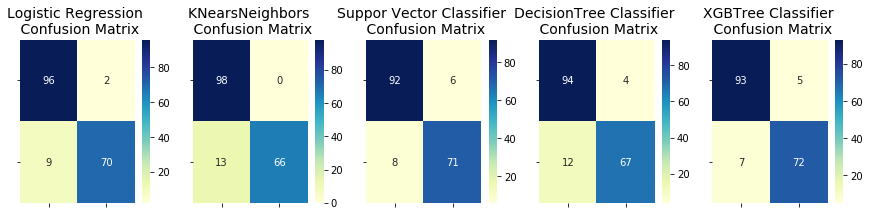

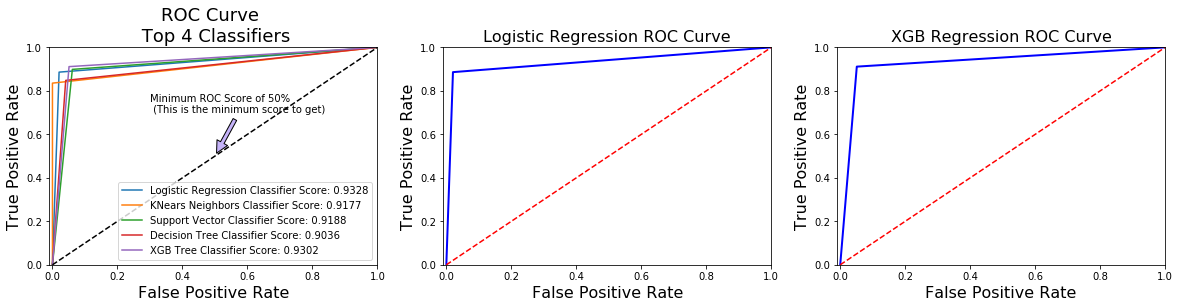

In [209]:
%%time
print('-'*20)
print('Basic results \n')
base(X_train, X_test, y_train, y_test)

print('-'*20)
print('\nGrid search results \n')
grid(X_train, X_test, y_train, y_test)


Best so far..

--------------------
Baeyesian results post feature selection 


best paramater to used --> 
 {'gamma': 0.5351728335797374, 'learning_rate': 0.047527081232804136, 'max_depth': 5.390035790763644}
classifier acc=  97.0

Classification_report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       104
           1       0.92      1.00      0.96        73

    accuracy                           0.97       177
   macro avg       0.96      0.97      0.97       177
weighted avg       0.97      0.97      0.97       177

CPU times: user 45.6 s, sys: 1.76 s, total: 47.4 s
Wall time: 13.9 s


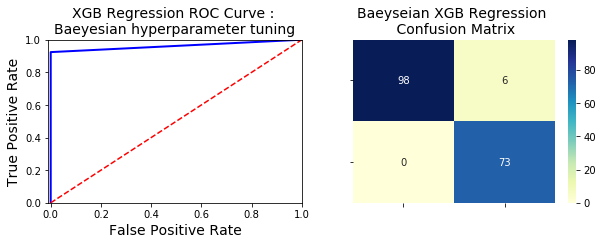

In [210]:
%%time
print('-'*20)
print('Baeyesian results post feature selection \n')
baey(X_train, X_test, y_train, y_test)

### Feature Engineering

In [211]:
imp ={}
imp_col = []

def feature_select():
    for key, classifier in classifiers.items():
        try:
            rfecv = RFECV(estimator=classifier, step=6, cv=StratifiedKFold(2),
                      scoring='accuracy')
            rfecv.fit(X_train, y_train)

            print("Optimal number of features : %d" % rfecv.n_features_)
            imp[key] = [X.columns[i] for i,v in enumerate(list(rfecv.ranking_))  if v in [1]]
            print(imp[key], "\n")

            # Plot number of features VS. cross-validation scores
            plt.figure()
            plt.xlabel("Number of features selected")
            plt.ylabel("CV acc for "+str(key))
            plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
            plt.show()

        except:
            print('na')

    imp_col = list(set(sum((list(imp.values())), [])))
    return imp_col

Optimal number of features : 6
['V4', 'V8', 'V10', 'V12', 'V14', 'V22'] 



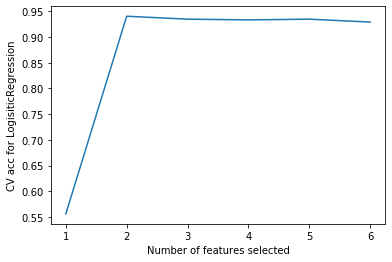

na
na
Optimal number of features : 12
['V4', 'V7', 'V12', 'V14', 'V15', 'V17', 'V20', 'V22', 'V23', 'V24', 'V26', 'V27'] 



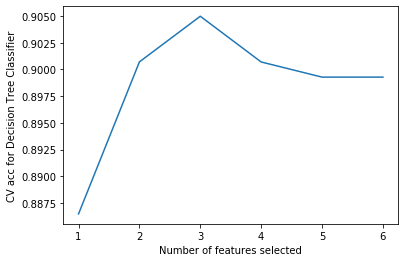

Optimal number of features : 18
['scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V7', 'V10', 'V12', 'V14', 'V15', 'V17', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V27'] 



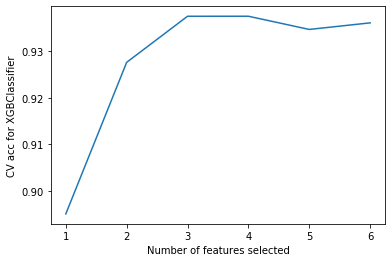

CPU times: user 5.62 s, sys: 173 ms, total: 5.8 s
Wall time: 2.43 s


In [212]:
%%time
imp_col = feature_select()

#### Re run models using the set of the above features : Displaying results


In [282]:
# Undersampling before cross validating (prone to overfit)
X = new_df1.drop('Class', axis=1)
y = new_df1['Class']

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X[imp_col], y, test_size=0.2, random_state=42, stratify = y)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Feature selection done prior to predicting with21 features,
which are:
['V1', 'V22', 'V3', 'V19', 'V4', 'V7', 'V12', 'V23', 'V27', 'V8', 'V20', 'V21', 'V25', 'V26', 'V17', 'V14', 'V15', 'V24', 'scaled_amount', 'V2', 'V10']
--------------------

Basic results post feature selection 

LogisticRegression  test accuracy score =  94.0
KNeighborsClassifier  test accuracy score =  92.0
SVC  test accuracy score =  92.0
DecisionTreeClassifier  test accuracy score =  88.0
XGBClassifier  test accuracy score =  93.0
--------------------

Grid search results post feature selection 

Logistic Regression Cross Validation Score on test:  94.35%
Knears Neighbors Cross Validation Score  on test 93.22%
Support Vector Classifier Cross Validation Score  on test 93.78%
DecisionTree Classifier Cross Validation Score  on test 90.41%
XGBTree Classifier Cross Validation Score 93.24%
CPU times: user 16 s, sys: 610 ms, total: 16.6 s
Wall time: 6.29 s


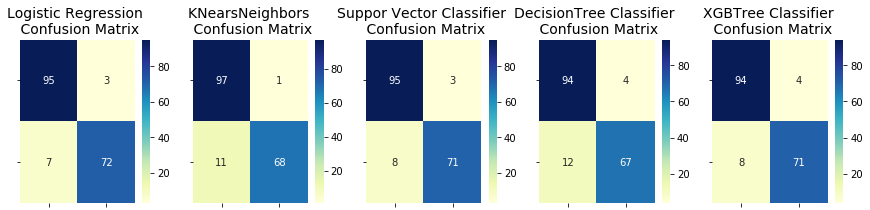

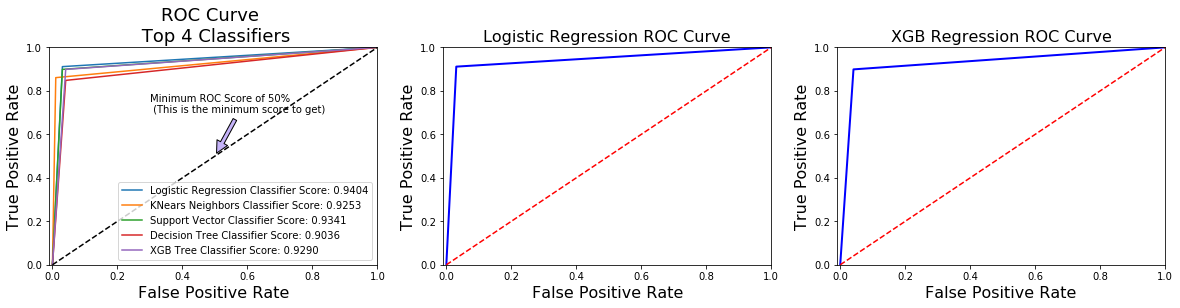

In [214]:
%%time
print("Feature selection done prior to predicting with" +str(len(imp_col))+" features,\nwhich are:")
print(list(X[imp_col].columns))
print('-'*20)
print('\nBasic results post feature selection \n')
base(X_train, X_test, y_train, y_test)

print('-'*20)
print('\nGrid search results post feature selection \n')
grid(X_train, X_test, y_train, y_test)

--------------------
Baeyesian results post feature selection 


best paramater to used --> 
 {'gamma': 0.8594461918373376, 'learning_rate': 0.13471921033379183, 'max_depth': 8.523154748453218}
classifier acc=  95.0

Classification_report
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       102
           1       0.92      0.97      0.95        75

    accuracy                           0.95       177
   macro avg       0.95      0.96      0.95       177
weighted avg       0.96      0.95      0.95       177

CPU times: user 44.5 s, sys: 2.58 s, total: 47.1 s
Wall time: 17.2 s


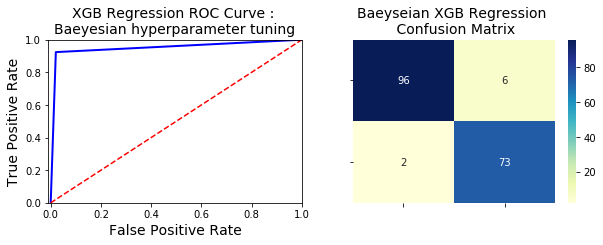

In [215]:
%%time
print('-'*20)
print('Baeyesian results post feature selection \n')
baey(X_train, X_test, y_train, y_test)

### Testing on original test set

In [244]:
test_df = pd.read_csv('/Users/ipsitapraharaj/Desktop/Paypal/orig_test_df.csv')

In [245]:
test_df

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.293579,-0.410343,-0.334463,1.186841,1.310615,0.054110,0.085975,-0.970724,0.749280,-0.108263,...,0.147669,-0.258214,-0.637832,-0.028227,0.351554,-0.140746,0.069840,0.250624,0.099393,0
1,0.408300,0.983799,-1.114370,0.297951,-0.770018,-1.212001,2.535608,3.951148,-0.145512,1.543896,...,0.126614,-0.259903,-0.765249,0.047789,0.713687,0.014445,0.131772,0.225937,0.080479,0
2,-0.181793,0.569943,-0.257022,0.926352,-0.696905,-1.012072,0.803521,0.161527,0.400225,0.605277,...,-0.145641,-0.255678,-0.832947,0.043502,-0.396128,-0.374679,0.160215,0.101116,0.018917,0
3,0.041780,0.879498,1.995531,-0.416104,-0.551114,0.323979,-0.330638,-0.011574,-0.571993,-0.033369,...,-0.049449,0.191435,0.768250,0.102971,0.569976,-0.129544,0.590779,-0.023482,-0.039797,0
4,1.198211,-0.235999,-5.002971,0.092067,0.429994,-2.392688,1.046462,0.301112,2.346360,-3.940798,...,-1.596305,0.418621,-0.705723,-0.249817,-0.289122,-0.339347,-1.697018,-4.706341,-2.886038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,2.345839,-0.382218,0.845534,-0.708998,0.714626,0.525801,-0.989718,-0.102807,-0.389243,0.127152,...,0.275455,0.129864,-0.091715,-0.145870,0.012840,0.075658,0.377730,-0.049846,0.043482,0
25628,-0.293440,-0.231347,1.276257,0.575129,-0.833187,0.970271,0.627460,-0.273383,0.120064,0.030139,...,-0.109664,-0.103692,-0.302062,-0.269059,-0.997101,0.784904,-0.269254,0.023719,0.033448,0
25629,0.237546,0.349088,2.189540,-1.482190,-0.702172,-1.661008,-1.220925,-0.078118,-1.326385,-0.008469,...,-0.302776,-0.066453,0.262772,0.262836,0.707606,-0.293815,-0.231683,0.022177,-0.041922,0
25630,0.206665,0.794265,0.380374,-0.062536,-0.162576,-0.755413,0.188744,0.436322,0.210087,0.064678,...,-0.390021,-0.079993,0.432148,0.108865,0.252339,-1.287111,0.571119,0.263589,0.266694,0


In [283]:
orig_X_test = test_df.drop('Class', axis=1)
orig_y_test = test_df['Class']

orig_X_test = orig_X_test[imp_col]

# Turn the values into an array for feeding the classification algorithms.

orig_X_test = orig_X_test.values
orig_y_test = orig_y_test.values

----------------------------------------
----------------------------------------
log_reg_params
Classifier acc=  97.0

Classification_report  
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     24910
           1       0.86      0.05      0.10       722

    accuracy                           0.97     25632
   macro avg       0.92      0.53      0.54     25632
weighted avg       0.97      0.97      0.96     25632

----------------------------------------
----------------------------------------
knears_params
Classifier acc=  99.0

Classification_report  
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     25333
           1       0.86      0.13      0.22       299

    accuracy                           0.99     25632
   macro avg       0.93      0.56      0.61     25632
weighted avg       0.99      0.99      0.99     25632

----------------------------------------
----------------

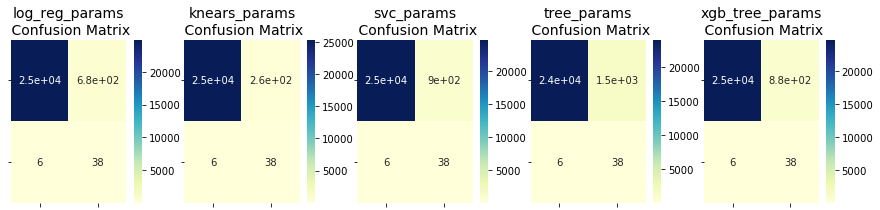

In [295]:
fig, ax = plt.subplots(1,len(grid_par) ,figsize=(15,3))
p = 0
for k,v in (grid_par).items():
    m = v.fit(X_train, y_train)
    pred = m.predict(orig_X_test)
    cf = confusion_matrix(orig_y_test,m.predict(orig_X_test))
    acc = cf.diagonal().sum()/cf.sum()
    
    print('--'*20)
    print('--'*20)
    print(str(k)+"\nClassifier acc= ",round(acc,2)*100)
    print("\nClassification_report  \n",classification_report(pred, orig_y_test))
    
    
    sns.heatmap(cf, ax=ax[p], annot=True, cmap="YlGnBu")
    ax[p].set_title(str(k)+"\n Confusion Matrix", fontsize=14)
    ax[p].set_xticklabels(['', ''], fontsize=14, rotation=90)
    ax[p].set_yticklabels(['', ''], fontsize=14, rotation=360)
    p = p+1
    